In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fbprophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

df0 = pd.read_csv("./input/CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("./input/CONVENIENT_global_deaths.csv")
df2 = pd.read_csv("./input/CONVENIENT_us_confirmed_cases.csv")
df3 = pd.read_csv("./input/CONVENIENT_us_deaths.csv")

/Users/xucheng/dev/da-venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

In [42]:
df0

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
0    Province/State          NaN      NaN      NaN      NaN     NaN   
1           1/23/20          0.0      0.0      0.0      0.0     0.0   
2           1/24/20          0.0      0.0      0.0      0.0     0.0   
3           1/25/20          0.0      0.0      0.0      0.0     0.0   
4           1/26/20          0.0      0.0      0.0      0.0     0.0   
..              ...          ...      ...      ...      ...     ...   
434         3/31/21         70.0    434.0    131.0     66.0   129.0   
435          4/1/21         63.0    349.0    112.0     43.0    88.0   
436          4/2/21         55.0    336.0    125.0     62.0    68.0   
437          4/3/21         23.0    341.0     95.0     59.0   112.0   
438          4/4/21         81.0    348.0     98.0     57.0    52.0   

     Antigua and Barbuda  Argentina  Armenia                     Australia  \
0                    NaN        NaN      NaN  Australian Capital Territory   
1                    0.0        0.0      0.0                           0.0   
2                    0.0        0.0      0.0                           0.0   
3                    0.0        0.0      0.0                           0.0   
4                    0.0        0.0      0.0                           0.0   
..                   ...        ...      ...                           ...   
434                  0.0    16056.0   1148.0                           0.0   
435                 11.0    14430.0   1097.0                           0.0   
436                  5.0     9902.0   1116.0                           0.0   
437                 18.0    10384.0   1192.0                           0.0   
438                  0.0     9955.0    590.0                           0.0   

     ... United Kingdom.11 Uruguay Uzbekistan Vanuatu Venezuela Vietnam  \
0    ...               NaN     NaN        NaN     NaN       NaN     NaN   
1    ...               0.0     0.0        0.0     0.0       0.0     2.0   
2    ...               0.0     0.0        0.0     0.0       0.0     0.0   
3    ...               0.0     0.0        0.0     0.0       0.0     0.0   
4    ...               0.0     0.0        0.0     0.0       0.0     0.0   
..   ...               ...     ...        ...     ...       ...     ...   
434  ...            4052.0  3088.0      187.0     0.0    1348.0     9.0   
435  ...            4478.0  2639.0      181.0     0.0    1254.0    14.0   
436  ...            3402.0  3380.0      189.0     0.0     979.0     3.0   
437  ...            3423.0  2336.0      196.0     0.0    1607.0     6.0   
438  ...            2297.0  3853.0      188.0     0.0    1786.0     5.0   

    West Bank and Gaza  Yemen  Zambia  Zimbabwe  
0                  NaN    NaN     NaN       NaN  
1                  0.0    0.0     0.0       0.0  
2                  0.0    0.0     0.0       0.0  
3                  0.0    0.0     0.0       0.0  
4                  0.0    0.0     0.0       0.0  
..                 ...    ...     ...       ...  
434             2288.0  110.0   219.0      43.0  
435             2292.0  174.0   131.0      14.0  
436             2248.0   89.0   181.0       7.0  
437             1589.0   77.0    70.0       8.0  
438             2806.0  101.0   130.0      12.0  

[439 rows x 275 columns]

In [43]:
df1

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
0    Province/State          NaN      NaN      NaN      NaN     NaN   
1           1/23/20          0.0      0.0      0.0      0.0     0.0   
2           1/24/20          0.0      0.0      0.0      0.0     0.0   
3           1/25/20          0.0      0.0      0.0      0.0     0.0   
4           1/26/20          0.0      0.0      0.0      0.0     0.0   
..              ...          ...      ...      ...      ...     ...   
434         3/31/21          8.0      8.0      4.0      0.0     1.0   
435          4/1/21          5.0      6.0      3.0      0.0     1.0   
436          4/2/21          6.0      6.0      3.0      1.0     0.0   
437          4/3/21          1.0      9.0      3.0      1.0     2.0   
438          4/4/21          1.0      9.0      3.0      0.0     2.0   

     Antigua and Barbuda  Argentina  Armenia                     Australia  \
0                    NaN        NaN      NaN  Australian Capital Territory   
1                    0.0        0.0      0.0                           0.0   
2                    0.0        0.0      0.0                           0.0   
3                    0.0        0.0      0.0                           0.0   
4                    0.0        0.0      0.0                           0.0   
..                   ...        ...      ...                           ...   
434                  0.0      122.0     18.0                           0.0   
435                  0.0       83.0     18.0                           0.0   
436                  0.0       82.0     19.0                           0.0   
437                  0.0       83.0     23.0                           0.0   
438                  0.0       93.0     17.0                           0.0   

     ... United Kingdom.11 Uruguay Uzbekistan Vanuatu Venezuela Vietnam  \
0    ...               NaN     NaN        NaN     NaN       NaN     NaN   
1    ...               0.0     0.0        0.0     0.0       0.0     0.0   
2    ...               0.0     0.0        0.0     0.0       0.0     0.0   
3    ...               0.0     0.0        0.0     0.0       0.0     0.0   
4    ...               0.0     0.0        0.0     0.0       0.0     0.0   
..   ...               ...     ...        ...     ...       ...     ...   
434  ...              43.0    21.0        1.0     0.0      13.0     0.0   
435  ...              51.0    35.0        1.0     0.0      13.0     0.0   
436  ...              52.0    32.0        0.0     0.0      14.0     0.0   
437  ...              10.0    30.0        0.0     0.0      18.0     0.0   
438  ...              10.0    30.0        1.0     0.0      15.0     0.0   

    West Bank and Gaza  Yemen  Zambia  Zimbabwe  
0                  NaN    NaN     NaN       NaN  
1                  0.0    0.0     0.0       0.0  
2                  0.0    0.0     0.0       0.0  
3                  0.0    0.0     0.0       0.0  
4                  0.0    0.0     0.0       0.0  
..                 ...    ...     ...       ...  
434               13.0    6.0     6.0       3.0  
435               18.0   18.0     4.0       0.0  
436               16.0   10.0     3.0       1.0  
437               20.0   16.0     0.0       0.0  
438               25.0   14.0     5.0       1.0  

[439 rows x 275 columns]

In [36]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df_confirmed.iloc[:,1:].columns
#world["Country"] = df_confirmed.iloc[:1,1:].keys()
cases = []
world

Country  Cases
0           Afghanistan    NaN
1               Albania    NaN
2               Algeria    NaN
3               Andorra    NaN
4                Angola    NaN
..                  ...    ...
269             Vietnam    NaN
270  West Bank and Gaza    NaN
271               Yemen    NaN
272              Zambia    NaN
273            Zimbabwe    NaN

[274 rows x 2 columns]

In [44]:
print(df0.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Columns: 275 entries, Country/Region to Zimbabwe
dtypes: float64(189), object(86)
memory usage: 943.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Columns: 275 entries, Country/Region to Zimbabwe
dtypes: float64(189), object(86)
memory usage: 943.3+ KB
None


In [45]:
print(df0.describe())
print(df1.describe())

       Afghanistan      Albania      Algeria     Andorra      Angola  \
count   438.000000   438.000000   438.000000  438.000000  438.000000   
mean    129.397260   288.883562   268.543379   27.924658   51.668950   
std     188.258907   329.859387   242.821641   43.353650   64.362052   
min       0.000000     0.000000     0.000000    0.000000    0.000000   
25%      17.250000    17.000000   112.000000    0.000000    1.000000   
50%      59.000000   133.500000   191.500000    8.000000   32.000000   
75%     165.750000   536.500000   391.750000   42.750000   77.000000   
max    1485.000000  1239.000000  1133.000000  299.000000  355.000000   

       Antigua and Barbuda     Argentina      Armenia      Austria  \
count           438.000000    438.000000   438.000000   438.000000   
mean              2.671233   5464.593607   448.936073  1275.696347   
std               8.683430   4757.985846   534.242457  1717.546081   
min              -1.000000      0.000000     0.000000     0.000000   
2

In [47]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"]=cases

country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()
continent=pd.read_csv("./input/continents2.csv")
continent["name"]=continent["name"].str.upper()
continent["name"]

0            AFGHANISTAN
1          ÅLAND ISLANDS
2                ALBANIA
3                ALGERIA
4         AMERICAN SAMOA
             ...        
244    WALLIS AND FUTUNA
245       WESTERN SAHARA
246                YEMEN
247               ZAMBIA
248             ZIMBABWE
Name: name, Length: 249, dtype: object

In [48]:
world["Cases Range"]=pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000],labels=["U50K","50Kto200K","200Kto800K","800Kto1.5M","1.5M+"])
alpha =[]
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES" 
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha

fig = px.choropleth(world.dropna(),
                   locations="Alpha3",
                   color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["white","khaki","yellow","orange","red"])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<AxesSubplot:title={'center':'Daily Covid19 Cases in World'}, xlabel='Date'>

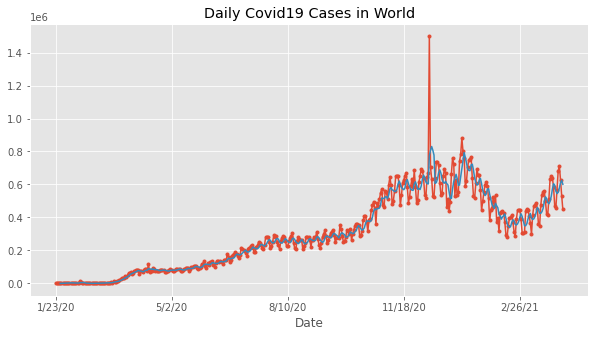

In [50]:
count = []
for i in range(1,len(df_confirmed)):
    count.append(sum(pd.to_numeric(df_confirmed.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df_confirmed["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(df_death)):
    count.append(sum(pd.to_numeric(df_death.iloc[i,1:].values)))

df["Deaths"] = count

df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")

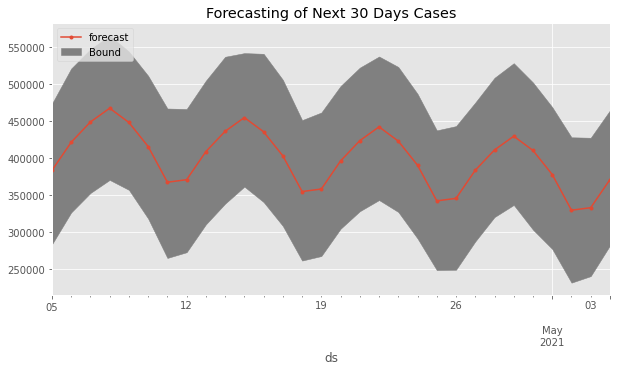

In [104]:
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])
        
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()

forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()

## US Cases Exploration
https://www.kaggle.com/chapagain/covid-19-usa-eda-chart-graph-map/execution

In [75]:
df_us_test = pd.read_csv("./input/us_covid19_daily.csv")
df_us_states_test = pd.read_csv("./input/us_states_covid19_daily.csv")

In [82]:
df_cases_state = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_state.csv")

In [84]:
state_map_dict = {
 'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'D.C.': 'District of Columbia',
 'FM': 'Federated States of Micronesia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MH': 'Marshall Islands',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PW': 'Palau',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'
}


state_code_dict = {v:k for k, v in state_map_dict.items()}
state_code_dict["Chicago"] = 'Illinois'

def correct_state_names(x):
    try:
        return state_map_dict[x.split(",")[-1].strip()]
    except:
        return x.strip()
    
def get_state_codes(x):
    try:
        return state_code_dict[x]
    except:
        return "Others"
    
def get_state_name(x):
    try:
        for name, code in state_code_dict.items():
            if code == x:
                return name
        return 'Others'
    except:
        return "Others"

In [86]:
df_us_states = df_cases_state[df_cases_state['Country_Region'] == 'US'].copy()
df_us_states["State_Code"] = df_us_states["Province_State"].apply(lambda x: get_state_codes(x))

In [87]:
import plotly.graph_objects as go

In [88]:
fig = go.Figure(data=[go.Pie(labels=df_us_states['Province_State'], 
           values=df_us_states['Confirmed'], 
           hole=.35,
           textinfo='label+percent'
          )
])

fig.update_layout(
    title_text="US Confirmed Cases by States",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text='Confirmed<br>Cases', showarrow=False),
    ]
)
fig.update_traces(textposition='inside')
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.show()

In [89]:
fig = go.Figure(data=[
    go.Pie(labels=df_us_states['Province_State'], 
           values=df_us_states['Deaths'], 
           hole=.35,
           textinfo='label+percent'
          )
])

fig.update_layout(
    title_text="US Deaths Cases by States",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text='Deaths<br>Cases', showarrow=False),
    ]
)
fig.update_traces(textposition='inside')
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.show()

In [90]:
df_confirmed_top = df_us_states.sort_values('Confirmed', ascending=False).head(10)
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=df_confirmed_top['Province_State'], y=df_confirmed_top['Confirmed'],
           text=df_confirmed_top['Confirmed'], texttemplate='%{text:.2s}', textposition='outside'),
    go.Bar(name='Deaths', x=df_confirmed_top['Province_State'], y=df_confirmed_top['Deaths'],
           text=df_confirmed_top['Deaths'], texttemplate='%{text:.2s}', textposition='outside'),
    go.Bar(name='Recovered', x=df_confirmed_top['Province_State'], y=df_confirmed_top['Recovered'],
           text=df_confirmed_top['Recovered'], texttemplate='%{text:.2s}', textposition='outside'),
    #go.Bar(name='People Tested', x=df_confirmed_top['Province_State'], y=df_confirmed_top['People_Tested'],
    #       text=df_confirmed_top['People_Tested'], texttemplate='%{text:.2s}', textposition='outside'),
])
# Change the bar mode
fig.update_layout(
    title_text="Top 10 US States with Confirmed Cases",
    barmode='group', 
    #legend_orientation="h",
    yaxis_type='log',
    yaxis_title='Cases Count in Log Scale'
)
fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1.1))
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.show()

In [91]:
df_us_states

Province_State Country_Region          Last_Update      Lat  \
492                   Alabama             US  2021-04-11 18:31:04  32.3182   
493                    Alaska             US  2021-04-11 18:31:04  61.3707   
494            American Samoa             US  2021-04-11 18:31:04 -14.2710   
495                   Arizona             US  2021-04-11 18:31:04  33.7298   
496                  Arkansas             US  2021-04-11 18:31:04  34.9697   
497                California             US  2021-04-11 18:31:04  36.1162   
498                  Colorado             US  2021-04-11 18:31:04  39.0598   
499               Connecticut             US  2021-04-11 18:31:04  41.5978   
500                  Delaware             US  2021-04-11 18:31:04  39.3185   
501          Diamond Princess             US  2021-04-11 18:31:04      NaN   
502      District of Columbia             US  2021-04-11 18:31:04  38.8974   
503                   Florida             US  2021-04-11 18:31:04  27.7663   
504                   Georgia             US  2021-04-11 18:31:04  33.0406   
505            Grand Princess             US  2021-04-11 18:31:04      NaN   
506                      Guam             US  2021-04-11 18:31:04  13.4443   
507                    Hawaii             US  2021-04-11 18:31:04  21.0943   
508                     Idaho             US  2021-04-11 18:31:04  44.2405   
509                  Illinois             US  2021-04-11 18:31:04  40.3495   
510                   Indiana             US  2021-04-11 18:31:04  39.8494   
511                      Iowa             US  2021-04-11 18:31:04  42.0115   
512                    Kansas             US  2021-04-11 18:31:04  38.5266   
513                  Kentucky             US  2021-04-11 18:31:04  37.6681   
514                 Louisiana             US  2021-04-11 18:31:04  31.1695   
515                     Maine             US  2021-04-11 18:31:04  44.6939   
516                  Maryland             US  2021-04-11 18:31:04  39.0639   
517             Massachusetts             US  2021-04-11 18:31:04  42.2302   
518                  Michigan             US  2021-04-11 18:31:04  43.3266   
519                 Minnesota             US  2021-04-11 18:31:04  45.6945   
520               Mississippi             US  2021-04-11 18:31:04  32.7416   
521                  Missouri             US  2021-04-11 18:31:04  38.4561   
522                   Montana             US  2021-04-11 18:31:04  46.9219   
523                  Nebraska             US  2021-04-11 18:31:04  41.1254   
524                    Nevada             US  2021-04-11 18:31:04  38.3135   
525             New Hampshire             US  2021-04-11 18:31:04  43.4525   
526                New Jersey             US  2021-04-11 18:31:04  40.2989   
527                New Mexico             US  2021-04-11 18:31:04  34.8405   
528                  New York             US  2021-04-11 18:31:04  42.1657   
529            North Carolina             US  2021-04-11 18:31:04  35.6301   
530              North Dakota             US  2021-04-11 18:31:04  47.5289   
531  Northern Mariana Islands             US  2021-04-11 18:31:04  15.0979   
532                      Ohio             US  2021-04-11 18:31:04  40.3888   
533                  Oklahoma             US  2021-04-11 18:31:04  35.5653   
534                    Oregon             US  2021-04-11 18:31:04  44.5720   
535              Pennsylvania             US  2021-04-11 18:31:04  40.5908   
536               Puerto Rico             US  2021-04-11 18:31:04  18.2208   
537              Rhode Island             US  2021-04-11 18:31:04  41.6809   
538            South Carolina             US  2021-04-11 18:31:04  33.8569   
539              South Dakota             US  2021-04-11 18:31:04  44.2998   
540                 Tennessee             US  2021-04-11 18:31:04  35.7478   
541                     Texas             US  2021-04-11 18:31:04  31.0545   
542                      Utah        

In [92]:
df_us_states_test["state_name"] = df_us_states_test["state"].apply(lambda x: get_state_name(x))
df_us_states_test.head(2)

date state  positive  probableCases  negative  pending  \
15632  2020-01-22    WA       0.0            NaN       0.0      NaN   
15631  2020-01-22    MA       NaN            NaN       NaN      NaN   

         totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
15632  totalTestEncountersViral               0.0                    NaN   
15631           totalTestsViral               1.0                    NaN   

       hospitalizedCumulative  ...  deathIncrease  hospitalizedIncrease  \
15632                     NaN  ...              0                     0   
15631                     NaN  ...              0                     0   

                                           hash  commercialScore  \
15632  4502685e582e68071bfe8f7e1b307bc09c16728d                0   
15631  01f5dcd6631859503ef1b62d81d49e41d12fc1bd                0   

       negativeRegularScore negativeScore positiveScore score grade  \
15632                     0             0             0     0   NaN   
15631                     0             0             0     0   NaN   

          state_name  
15632     Washington  
15631  Massachusetts  

[2 rows x 56 columns]

In [94]:
df_t = df_us_states_test.groupby('date').sum().reset_index()
df_t

date    positive  probableCases     negative  pending  \
0    2020-01-22         0.0            0.0          0.0      0.0   
1    2020-01-23         0.0            0.0          0.0      0.0   
2    2020-01-24         0.0            0.0          0.0      0.0   
3    2020-01-25         0.0            0.0          0.0      0.0   
4    2020-01-26         0.0            0.0          0.0      0.0   
..          ...         ...            ...          ...      ...   
315  2020-12-02  13711156.0       530350.0  156787587.0  14368.0   
316  2020-12-03  13921360.0       545544.0  158026052.0  15106.0   
317  2020-12-04  14146191.0       560291.0  159286709.0  12714.0   
318  2020-12-05  14357264.0       574764.0  160813704.0  13433.0   
319  2020-12-06  14534035.0       583908.0  161986294.0  13592.0   

     totalTestResults  hospitalizedCurrently  hospitalizedCumulative  \
0                 1.0                    0.0                     0.0   
1                 2.0                    0.0                     0.0   
2                 2.0                    0.0                     0.0   
3                 2.0                    0.0                     0.0   
4                 2.0                    0.0                     0.0   
..                ...                    ...                     ...   
315       196576482.0               100322.0                570121.0   
316       198404712.0               100755.0                575452.0   
317       200259581.0               101276.0                580104.0   
318       202429337.0               101190.0                583420.0   
319       204063869.0               101487.0                585676.0   

     inIcuCurrently  inIcuCumulative  ...  totalTestResultsIncrease  \
0               0.0              0.0  ...                         0   
1               0.0              0.0  ...                         1   
2               0.0              0.0  ...                         0   
3               0.0              0.0  ...                         0   
4               0.0              0.0  ...                         0   
..              ...              ...  ...                       ...   
315         19680.0          31038.0  ...                   1459202   
316         19723.0          31276.0  ...                   1828230   
317         19858.0          31608.0  ...                   1854869   
318         19950.0          31831.0  ...                   2169756   
319         20145.0          31946.0  ...                   1634532   

        posNeg  deathIncrease  hospitalizedIncrease  commercialScore  \
0            0              0                     0                0   
1            0              0                     0                0   
2            0              0                     0                0   
3            0              0                     0                0   
4            0              0                     0                0   
..         ...            ...                   ...              ...   
315  170498743           2733                  5028                0   
316  171947412           2706                  5331                0   
317  173432900           2563                  4652                0   
318  175170968           2445                  3316                0   
319  176520329           1138                  2256                0   

     negativeRegularScore  negativeScore  positiveScore  score  grade  
0                       0              0              0      0    0.0  
1                       0              0              0      0    0.0  
2                       0              0              0      0    0.0  
3                       0              0              0      0    0.0  
4                       0              0              0      0    0.0  
..                    ...            ...            ...    ...    ...  
315                     0              0              0      0    0.0  
316                     0          

In [95]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['positive'], 
                         mode='lines', name='Confirmed'))
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['death'], 
                         mode='lines', name='Deaths'))
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['recovered'], 
                         mode='lines', name='Recovered'))
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['hospitalized'], 
                         mode='lines', name='Hospitalized'))
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['total'], 
                         mode='lines', name='Total Tested'))

fig.update_layout(
        xaxis_title="",
        yaxis_title="Cases Count in Log Scale",
        title = 'Time Series - Confirmed, Deaths & Recovered Cases in USA',
        yaxis_type='log'
    )
fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        #bgcolor="LightSteelBlue",
        bordercolor="silver",
        borderwidth=1
    )
)
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.show()

In [96]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['recovered']/df_t['positive']*100, 
                         mode='lines', name='Recovery Rate'))
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['death']/df_t['positive']*100, 
                         mode='lines', name='Death Rate'))

fig.update_layout(
        xaxis_title="",
        yaxis_title="Recovery/Death Rate Percentage (%)",
        title = 'Time Series - Recovery and Death Rate in USA',
        yaxis_type='log'
    )

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        #font=dict(
        #    family="sans-serif",
        #    size=12,
        #    color="black"
        #),
        #bgcolor="LightSteelBlue",
        bordercolor="silver",
        borderwidth=1
    )
)
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.show()

In [98]:
df_t = df_us_states_test.groupby(['state_name', 'date']).sum().reset_index()
df_t["date_reported"] = pd.to_datetime(df_t["date"]).dt.strftime('%m/%d/%Y')
df_t['state'] = df_t['state_name'].apply(lambda x: get_state_codes(x))
# while calculating mortality rate, adding 1 to confirmed to avoid divide by zero
df_t['mortality_rate'] = df_t['death'] / (df_t['positive']+1) * 100

df_t2 = df_t.groupby(['date', 'state_name']).max().reset_index()
df_t2.sort_values('date', ascending=False).head()

date   state_name  positive  probableCases   negative  pending  \
15632  2020-12-06      Wyoming   36317.0         4756.0   144576.0      0.0   
15604  2020-12-06      Montana   67875.0            0.0   620339.0      0.0   
15602  2020-12-06  Mississippi  164931.0        37611.0   982395.0      0.0   
15601  2020-12-06    Minnesota  350862.0         8459.0  2301135.0      0.0   
15600  2020-12-06     Michigan  426576.0        31540.0  6538482.0      0.0   

       totalTestResults  hospitalizedCurrently  hospitalizedCumulative  \
15632          417627.0                  212.0                   852.0   
15604          688214.0                  475.0                  2836.0   
15602         1147326.0                 1157.0                  7486.0   
15601         4431677.0                 1679.0                 18233.0   
15600         6965058.0                 4141.0                     0.0   

       inIcuCurrently  ...  hospitalizedIncrease  commercialScore  \
15632             0.0  ...                     9                0   
15604            77.0  ...                    21                0   
15602           286.0  ...                     0                0   
15601           367.0  ...                   174                0   
15600           855.0  ...                     0                0   

       negativeRegularScore  negativeScore  positiveScore  score  grade  \
15632                     0              0              0      0    0.0   
15604                     0              0              0      0    0.0   
15602                     0              0              0      0    0.0   
15601                     0              0              0      0    0.0   
15600                     0              0              0      0    0.0   

       date_reported  state  mortality_rate  
15632     12/06/2020     WY        0.707638  
15604     12/06/2020     MT        1.084330  
15602     12/06/2020     MS        2.401596  
15601     12/06/2020     MN        1.135486  
15600     12/06/2020     MI        2.419493  

[5 rows x 51 columns]

In [100]:
fig = px.choropleth(df_t2, locations="state", locationmode='USA-states', scope="usa",
                     hover_name="state_name", hover_data=["positive", "death", "recovered"], animation_frame="date",
                     color=np.log(df_t2["positive"]+1), 
                     title="US COVID-19 Progression Animation Over Time",
                     color_continuous_scale=px.colors.sequential.Plasma,
                   )
#fig.update_coloraxes(colorscale="hot")
#fig.update(layout_coloraxis_showscale=False)
fig.update_coloraxes(colorbar_title="Color<br>Confirmed Cases<br>in Log Scale")
fig.show()